In [1]:
# import the libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# importing dataset

dataset = pd.read_csv("Position_Salaries.csv")
x = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:,-1].values

In [4]:
# x is already dim 2
print(x)

# y has to be converted to dim 2
# Standard scaler expects 2D array as input
y = y.reshape(-1,1)
print(y)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]
[[  45000]
 [  50000]
 [  60000]
 [  80000]
 [ 110000]
 [ 150000]
 [ 200000]
 [ 300000]
 [ 500000]
 [1000000]]


In [5]:
# feature scaling

from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
sc_y = StandardScaler()
x = sc_x.fit_transform(x)
y = sc_y.fit_transform(y)
# here we need diff scalers for x and y beacause both will have diff mean and std dev
# we cant apply same scaler to both x and y

# dont apply scaling 
# ~ to dummy variables resulting out of one hot encoding
# ~ to dependent variable already taking values zero / one or between zero and one

# apply feature scaling
# ~ to dependent and independent when values are ranging from low to some high values as well

# if dataset is being split into test and train then apply feature
# scaling ONLY AFTER the split
# also remember to scale the test data with the training scale parameters




In [6]:
print(x)

[[-1.5666989 ]
 [-1.21854359]
 [-0.87038828]
 [-0.52223297]
 [-0.17407766]
 [ 0.17407766]
 [ 0.52223297]
 [ 0.87038828]
 [ 1.21854359]
 [ 1.5666989 ]]


In [7]:
print(y)

[[-0.72004253]
 [-0.70243757]
 [-0.66722767]
 [-0.59680786]
 [-0.49117815]
 [-0.35033854]
 [-0.17428902]
 [ 0.17781001]
 [ 0.88200808]
 [ 2.64250325]]


In [8]:
# training the SVR model on the dataset

from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(x,y)

C:\Users\gaura\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

In [14]:
# predicting a result
y_pred = regressor.predict(sc_x.transform([[6.5]]))

# we have to scale the input 6.5 with the same scaler as used 
# for scaling the x before/ sc_x scaler object has this information

In [15]:
y_pred

array([-0.27861589])

In [17]:
y_pred_final = sc_y.inverse_transform([y_pred])

In [18]:
y_pred_final

array([[170370.0204065]])

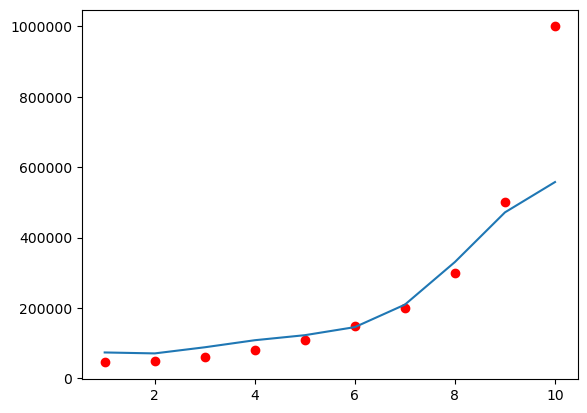

In [25]:
# visualising results


plt.scatter(sc_x.inverse_transform(x), sc_y.inverse_transform(y), color='red')
plt.plot(sc_x.inverse_transform(x), (sc_y.inverse_transform([regressor.predict(x)])).reshape(-1,1))
plt.show()